## 제6장. 머신러닝
## 제5절. 서포트 벡터 머신
### 1. 분류
(1) scikit-learn의 LinearSVC
* 코드 실습

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c=pd.read_csv('../data/classification.csv')
c

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


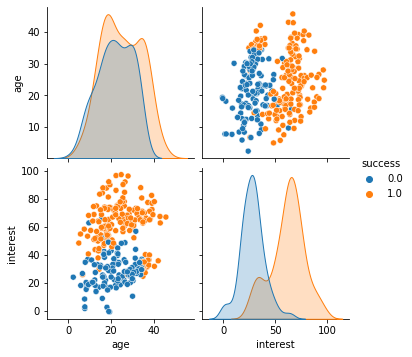

In [2]:
 sns.pairplot(hue='success', data=c)

In [3]:
from sklearn.model_selection import train_test_split

x=c[['age', 'interest']]
y=c['success']

train_x, test_x, train_y, test_y = train_test_split(x,y,stratify=y, train_size=0.7, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(207, 2) (90, 2) (207,) (90,)


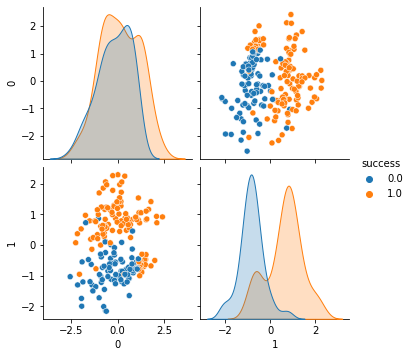

In [4]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
train_x=scaler.fit_transform(train_x)
sns.pairplot(data=pd.concat([pd.DataFrame(train_x), train_y.reset_index(drop=True)], axis=1),
             hue='success')

In [5]:
from sklearn.svm import SVC

clf = SVC(C=0.5)
clf.fit(train_x, train_y)

SVC(C=0.5)

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

test_x_scal = scaler.transform(test_x)
pred=clf.predict(test_x_scal)
test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y, pred)
test_rcll=recall_score(test_y, pred)
test_f1=f1_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[37  2]
 [ 2 49]]


정확도	95.56%
정밀도	96.08%
재현율	96.08%
F1	96.08%


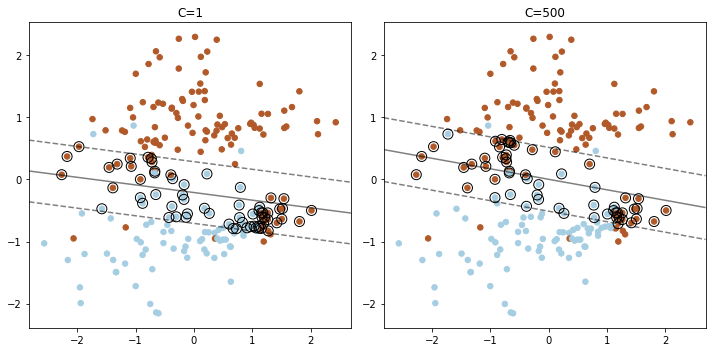

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 500]):
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(train_x, train_y)
    # decision function으로 서포트벡터 얻기
    decision_function = clf.decision_function(train_x)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = train_x[support_vector_indices]

    plt.subplot(1, 2, i +1)
    plt.scatter(train_x[:, 0], train_x[:, 1], c =train_y, s =30, cmap =plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(
        xx,
        yy,
        Z,
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C="+str(C))
plt.tight_layout()
plt.show()

### 2. 회귀
(1) scikit-learn의 LinearSVR
* 코드 실습

In [8]:
import numpy as np

# 샘플데이터 생성하기
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

print(X[0:6], '\n\n', y[0:10])

[[0.12395389]
 [0.49788943]
 [0.53963495]
 [0.58695048]
 [0.87304677]
 [0.88373911]] 

 [0.12363672 0.47757228 0.51382285 0.55382447 0.76629002 0.77311586
 0.91102709 0.99837518 0.99999277 0.99866024]


In [9]:
# 타깃데이터에 노이즈 추가하기
y[::5] += 3 * (0.5 - np.random.rand(8))

print(y[0:10])

[0.72955806 0.47757228 0.51382285 0.55382447 0.76629002 2.00198688
 0.91102709 0.99837518 0.99999277 0.99866024]


In [10]:
from sklearn.svm import SVR

# 회귀 모델 적합시키기
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(X, y)
svr_lin.fit(X, y)
svr_poly.fit(X, y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [11]:
rbf_pred=svr_rbf.predict(X)
lin_pred=svr_lin.predict(X)
poly_pred=svr_poly.predict(X)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random_Forest', 'Linear', 'Polynomial']
evls = ['mse', 'rmse', 'mae']

results=pd.DataFrame(index =kernel,columns =evls)

for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse']=round(mse,2)
    results.loc[nm]['rmse']=round(rmse,2)
    results.loc[nm]['mae']=round(mae,2)

results

,mse,rmse,mae
Random_Forest,0.11,0.33,0.17
Linear,0.19,0.44,0.31
Polynomial,0.11,0.34,0.18


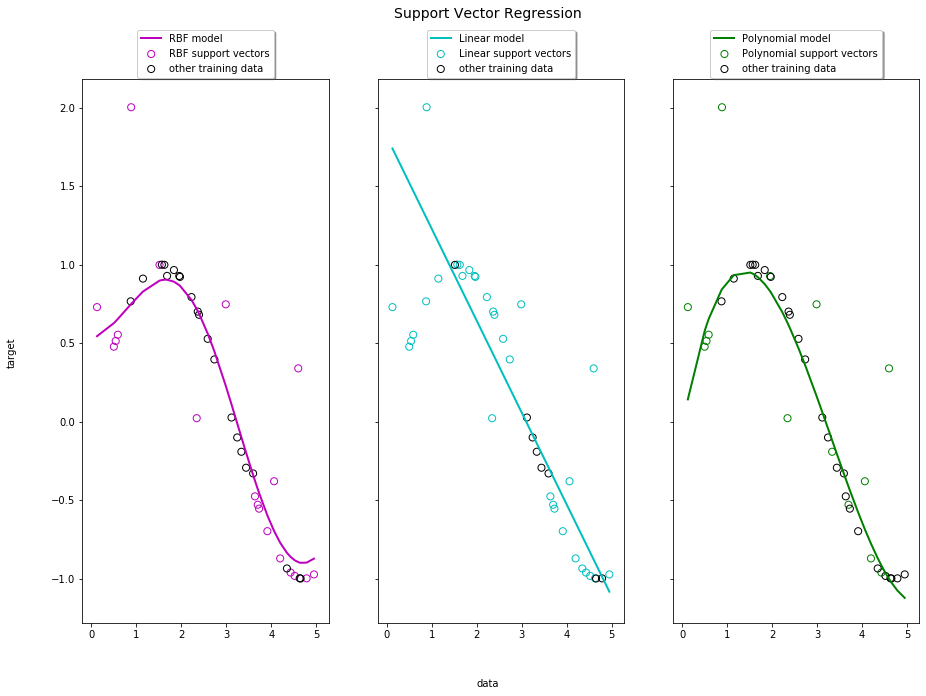

In [12]:
import matplotlib.pyplot as plt
lw =2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()